# Import Class

In [28]:
#import DataFetcher class from file heart_data.py
import DataFetcher #importing the file DataFetcher.py from the folder data
data_fetcher = DataFetcher.DataFetcher("C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\preprocessing\\final_dataset.csv")
X_train = data_fetcher.get_X_train()
X_test = data_fetcher.get_X_test()
y_train = data_fetcher.get_y_train()
y_test = data_fetcher.get_y_test()
features = data_fetcher.get_features()
target_names = data_fetcher.get_target_names()
X = data_fetcher.get_X()
y = data_fetcher.get_y()

# Initial Model

In [29]:
#train RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(random_state=42) #n_estimators: 100, max_depth = 2
rf1.fit(X_train, y_train)

#predict
y_pred_1 = rf1.predict(X_test)


#---------------------------------Evaluating the model---------------------------------

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------RF Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred_1))
print("Precision:", precision_score(y_test, y_pred_1))
print("Recall:", recall_score(y_test, y_pred_1))
print("F1 Score:", f1_score(y_test, y_pred_1))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct

#classification_report
print("\n----------Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_1)
print(cr)


----------RF Metrics----------

Accuracy: 0.8833333333333333
Precision: 0.8918918918918919
Recall: 0.9166666666666666
F1 Score: 0.9041095890410958

----------Classification Report----------

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.89      0.92      0.90        36

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



## confusion matrix of the initial model

[[20  4]
 [ 3 33]]


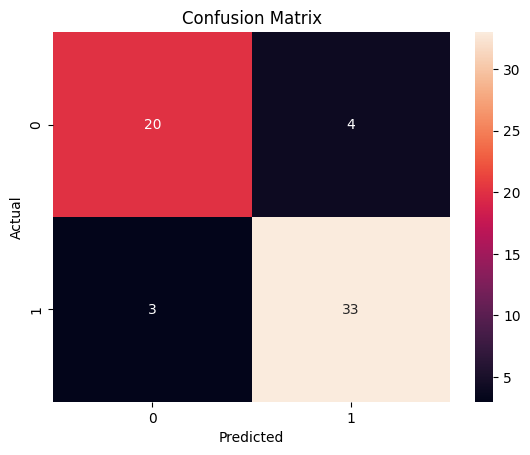

In [30]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_1)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Grid Search for best parameters

In [32]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 4, 10, 20, 40, 80, 90, 100, 110],
    'max_features': ["sqrt", "log2"],
    'min_samples_leaf': [4, 8, 10, 20, 30],
    'min_samples_split': [4, 8, 10, 20, 30],
    'n_estimators': [20, 50, 100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state=42), param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

#take the best estimator as final model
rf2 = grid_search.best_estimator_

#print the best parameters
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

Fitting 3 folds for each of 2700 candidates, totalling 8100 fits
{'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 1000}
RandomForestClassifier(max_depth=2, min_samples_leaf=8, min_samples_split=4,
                       n_estimators=1000, random_state=42)
0.8327004219409283


# Final Model

## Basic Metrics

In [34]:
'''RandomForestClassifier(max_depth=2, min_samples_leaf=8, min_samples_split=4,
                       n_estimators=1000, random_state=42)
'''

#train RandomForestClassifier tuned
from sklearn.ensemble import RandomForestClassifier
rf2.fit(X_train, y_train)

#predict
y_pred = rf2.predict(X_test)


#---------------------------------Evaluating the model---------------------------------

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------RF Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct

#classification_report
print("\n----------Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)


----------RF Metrics----------

Accuracy: 0.95
Precision: 0.9459459459459459
Recall: 0.9722222222222222
F1 Score: 0.9589041095890412

----------Classification Report----------

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.95      0.97      0.96        36

    accuracy                           0.95        60
   macro avg       0.95      0.94      0.95        60
weighted avg       0.95      0.95      0.95        60



## Confusion Matrix

[[22  2]
 [ 1 35]]


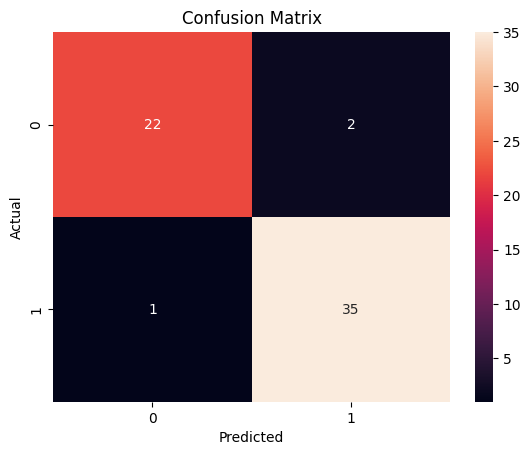

In [35]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Cross Validation

In [36]:
#cross validation for 10 folds

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf2, X, y, cv=10, scoring="f1") #scoring can be accuracy, precision, recall, f1, roc_auc, etc
#get the scores for each fold
for i in range(10):
    print("Fold", i, ":", scores[i])
    
#get the mean of the scores
print("\nMean:", scores.mean())
#get the standard deviation of the scores
print("Standard Deviation:", scores.std()) #standard deviation is calculated for the scores of each fold
#A low standard deviation indicates that the model is consistent in its performance across different subsets of the data, which is a good sign.
#get the variance of the scores
print("Variance:", scores.var()) #variance is calculated for the scores of each fold
#A low variance indicates that the model is consistent in its performance across different subsets of the data, which is a good sign.


Fold 0 : 0.8717948717948718
Fold 1 : 0.8648648648648648
Fold 2 : 0.8648648648648648
Fold 3 : 0.9375
Fold 4 : 0.9142857142857143
Fold 5 : 0.7999999999999999
Fold 6 : 0.8333333333333334
Fold 7 : 0.9090909090909091
Fold 8 : 0.7777777777777777
Fold 9 : 0.8571428571428572

Mean: 0.8630655193155192
Standard Deviation: 0.047471415682161705
Variance: 0.0022535353068685884


## Learning Curve

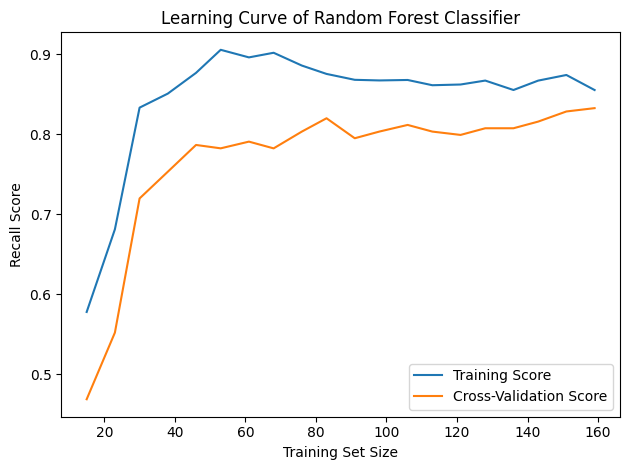

In [41]:
#plot the learning curve for the model
#use Recall as the scoring metric because the model should idealy minimize the number of false negatives.
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(rf2, X_train, y_train, cv=3, scoring="accuracy",n_jobs=-1, train_sizes=np.linspace(0.1,1.0,20))
#train_sizes: the proportion of the training set to include in the learning curve.
#train_sizes=np.linspace(0.1,1.0,4) means the training set size will be 10%, 40%, 70%, and 100% of the training set.
#train_scores: the scores for each training subset
#test_scores: the scores for each testing subset

#plot the learning curve
import matplotlib.pyplot as plt
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-Validation Score")
plt.title("Learning Curve of Random Forest Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Recall Score")
plt.legend(loc="best")
plt.tight_layout() 
plt.show()

## PRC

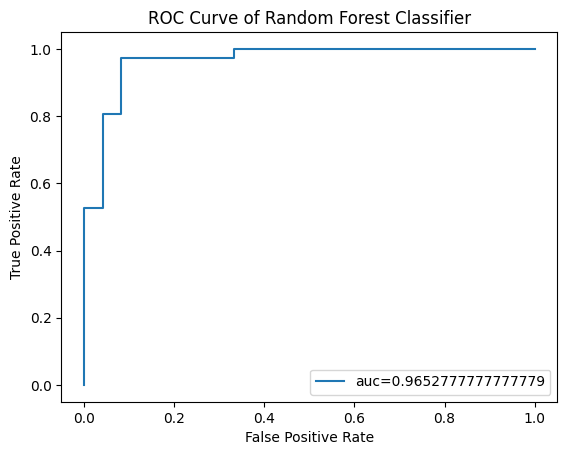

In [49]:
#plot roc curve for the model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_proba = rf2.predict_proba(X_test)[::,1] #get the probability of the positive class. [::,1] means get the second column of the array


fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc)) 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Random Forest Classifier")
plt.legend(loc="best")
plt.show()

